In [1]:
#!/Users/hector/anaconda3/envs/test-gui/bin/python

# import PySimpleGUI as sg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seawater
import os.path

%load_ext autoreload
%autoreload 2

from CTD_library import *

In [2]:
df0, metadata = read_ctd("Datos/V000019.TXT")
df0, metadata = read_ctd("Datos/V000015.TXT")
df0

,Pressure,Temperature,Conductivity
0,-0.000,29.483,-0.017
1,-0.001,29.489,-0.016
2,-0.002,29.499,-0.016
3,-0.002,29.504,-0.017
4,0.001,29.512,-0.016
...,...,...,...
12398,-0.018,30.589,-0.017
12399,-0.021,30.593,-0.017
12400,-0.019,30.592,-0.017
12401,-0.020,30.592,-0.017


In [3]:
df0.Conductivity[df0.Conductivity<0]

0       -0.017
1       -0.016
2       -0.016
3       -0.017
4       -0.016
         ...  
12398   -0.017
12399   -0.017
12400   -0.017
12401   -0.017
12402   -0.017
Name: Conductivity, Length: 10599, dtype: float64

<Axes: >

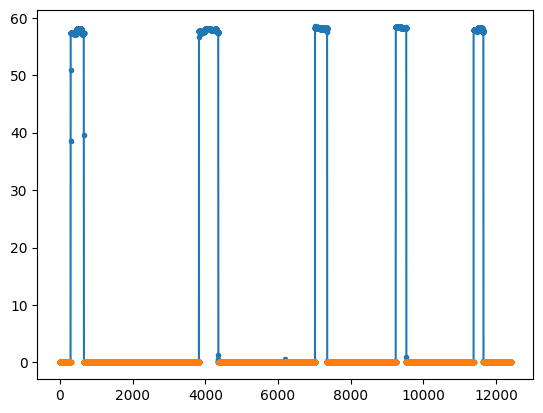

In [4]:
df0.Conductivity.plot(marker=".")
df0.Conductivity[df0.Conductivity<0].plot(marker=".", mfc="none", lw=0)

In [5]:
metadata

{'Now': '12/09/2023 09:16:56',
 'Battery Level': '1.4V',
 '\x00MiniCTD': 'S/N 58934',
 'Site info': '2023_AMARRADEROBOYANORTE_12SEP',
 'Calibrated': '22/02/2017',
 'Latitude': '21.361392',
 'Mode': 'M1',
 'Tare': '10.1028',
 'Pressure units': 'dBar'}

In [6]:
df1 = separate_throws(df0, metadata, threshold=0)
df1

,Pressure,Temperature,Conductivity,Lances,time
0,-0.000,29.483,-0.017,-1,2023-12-09 09:16:56
1,-0.001,29.489,-0.016,-1,2023-12-09 09:16:57
2,-0.002,29.499,-0.016,-1,2023-12-09 09:16:58
3,-0.002,29.504,-0.017,-1,2023-12-09 09:16:59
4,0.001,29.512,-0.016,-1,2023-12-09 09:17:00
...,...,...,...,...,...
12398,-0.018,30.589,-0.017,-1,2023-12-09 12:43:34
12399,-0.021,30.593,-0.017,-1,2023-12-09 12:43:35
12400,-0.019,30.592,-0.017,-1,2023-12-09 12:43:36
12401,-0.020,30.592,-0.017,-1,2023-12-09 12:43:37


<Axes: >

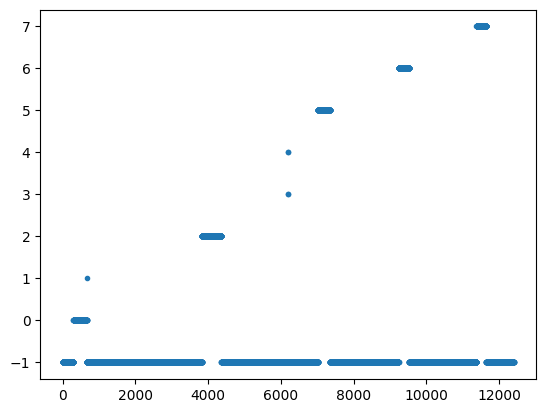

In [7]:
df1.Lances.plot(lw=0, marker=".")

In [8]:
df = calculate_ctd(df1)
df

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/seawater/library.py:363: RuntimeWarning: invalid value encountered in sqrt
  Rtx = (rt) ** 0.5


,Pressure,Temperature,Conductivity,Lances,time,Cond_Ratio,Salinity,Density
0,-0.000,29.483,-0.017,-1,2023-12-09 09:16:56,-0.000396,NaN,NaN
1,-0.001,29.489,-0.016,-1,2023-12-09 09:16:57,-0.000373,NaN,NaN
2,-0.002,29.499,-0.016,-1,2023-12-09 09:16:58,-0.000373,NaN,NaN
3,-0.002,29.504,-0.017,-1,2023-12-09 09:16:59,-0.000396,NaN,NaN
4,0.001,29.512,-0.016,-1,2023-12-09 09:17:00,-0.000373,NaN,NaN
...,...,...,...,...,...,...,...,...
12398,-0.018,30.589,-0.017,-1,2023-12-09 12:43:34,-0.000396,NaN,NaN
12399,-0.021,30.593,-0.017,-1,2023-12-09 12:43:35,-0.000396,NaN,NaN
12400,-0.019,30.592,-0.017,-1,2023-12-09 12:43:36,-0.000396,NaN,NaN
12401,-0.020,30.592,-0.017,-1,2023-12-09 12:43:37,-0.000396,NaN,NaN


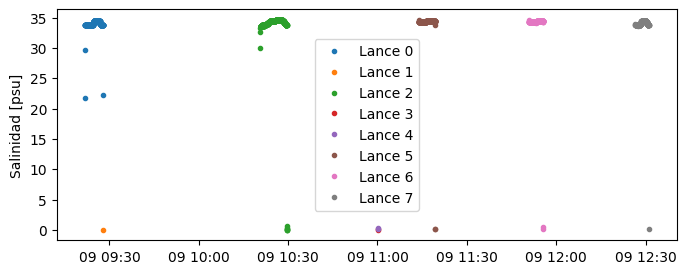

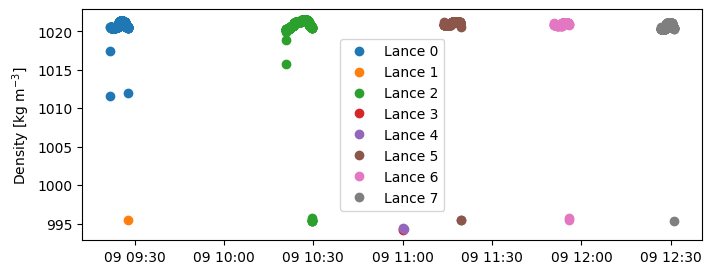

In [9]:
fig0, fig1 = plot_ctd(df)

In [10]:
metadata

{'Now': '12/09/2023 09:16:56',
 'Battery Level': '1.4V',
 '\x00MiniCTD': 'S/N 58934',
 'Site info': '2023_AMARRADEROBOYANORTE_12SEP',
 'Calibrated': '22/02/2017',
 'Latitude': '21.361392',
 'Mode': 'M1',
 'Tare': '10.1028',
 'Pressure units': 'dBar'}

In [11]:
output_throws(df,metadata)

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/seawater/library.py:363: RuntimeWarning: invalid value encountered in sqrt
  Rtx = (rt) ** 0.5


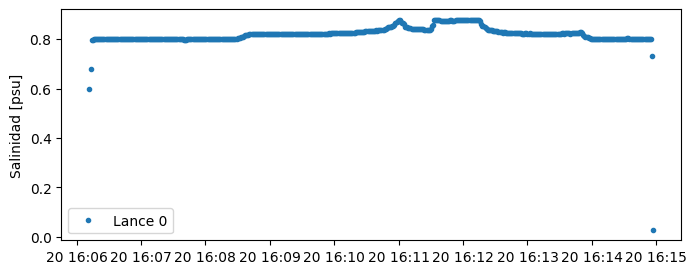

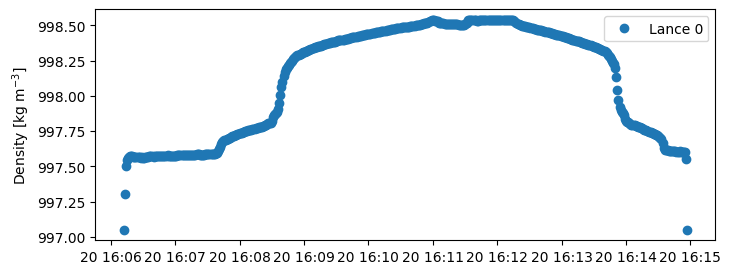

In [12]:
df, fig0, fig1 = analyze_ctd("Datos/V000063.TXT", plot=True)

In [13]:
# Build layout

layout = [[sg.T("")],
          [sg.Text("Choose file to analyze: "), 
           sg.Input(),
           sg.FileBrowse(key="-IN-")
          ],[sg.Button("Submit")]
         ]

# Building Window
window = sg.Window('My File Browser', layout, size=(600,150))
    
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event=="Exit":
        break
    elif event == "Submit":
        print("Analyzing {}".format(values["-IN-"]))

    _ = analyze_ctd(values["-IN-"])

NameError: name 'sg' is not defined

In [16]:
import PySimpleGUIWeb as sg

ModuleNotFoundError: No module named 'PySimpleGUIWeb'

In [16]:
%%bash 
pip3 install PySimpleGUIWeb

In [15]:
%%bash
pip list


Package                   Version
------------------------- ------------
anyio                     4.2.0
appnope                   0.1.3
archspec                  0.2.2
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.14.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.1.0
boltons                   23.1.1
Brotli                    1.1.0
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.0
conda                     23.11.0
conda-libmamba-solver     23.12.0
conda-package-handling    2.2.0
conda_package_streaming   0.9.0
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.6.7
decorator                 5.1.1
defusedxml    